1.HOUSE PRICE PREDICTION

Write a program that takes in data on houses as input and uses machine-learning algorithms to predict the retail price of each
house. The program should be able to handle a variety of features, such as the number of rooms, size, age, location, etc., and use these features to train multiple machine learning models.

Your task is to compare the accuracy of the different models and identify which model performs best for predicting house prices. 

You can use metrics such as mean squared error or R-squared value to evaluate the performance of each model

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
data=pd.read_csv(r"C:\Users\Ashwini\Downloads\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

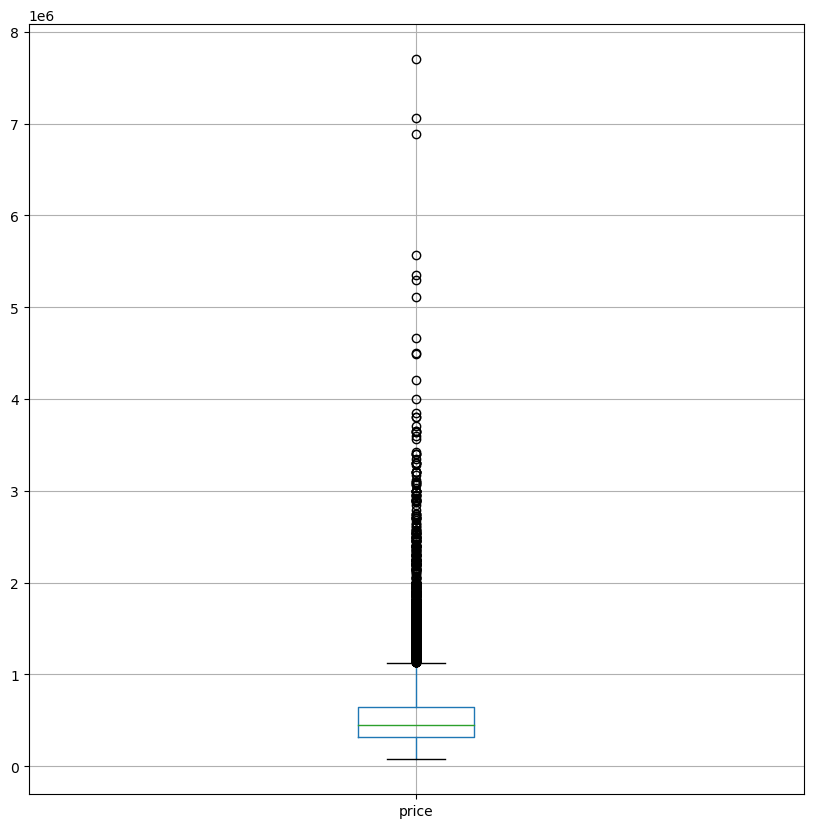

In [49]:
data.boxplot(['price'], figsize=(10, 10))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft

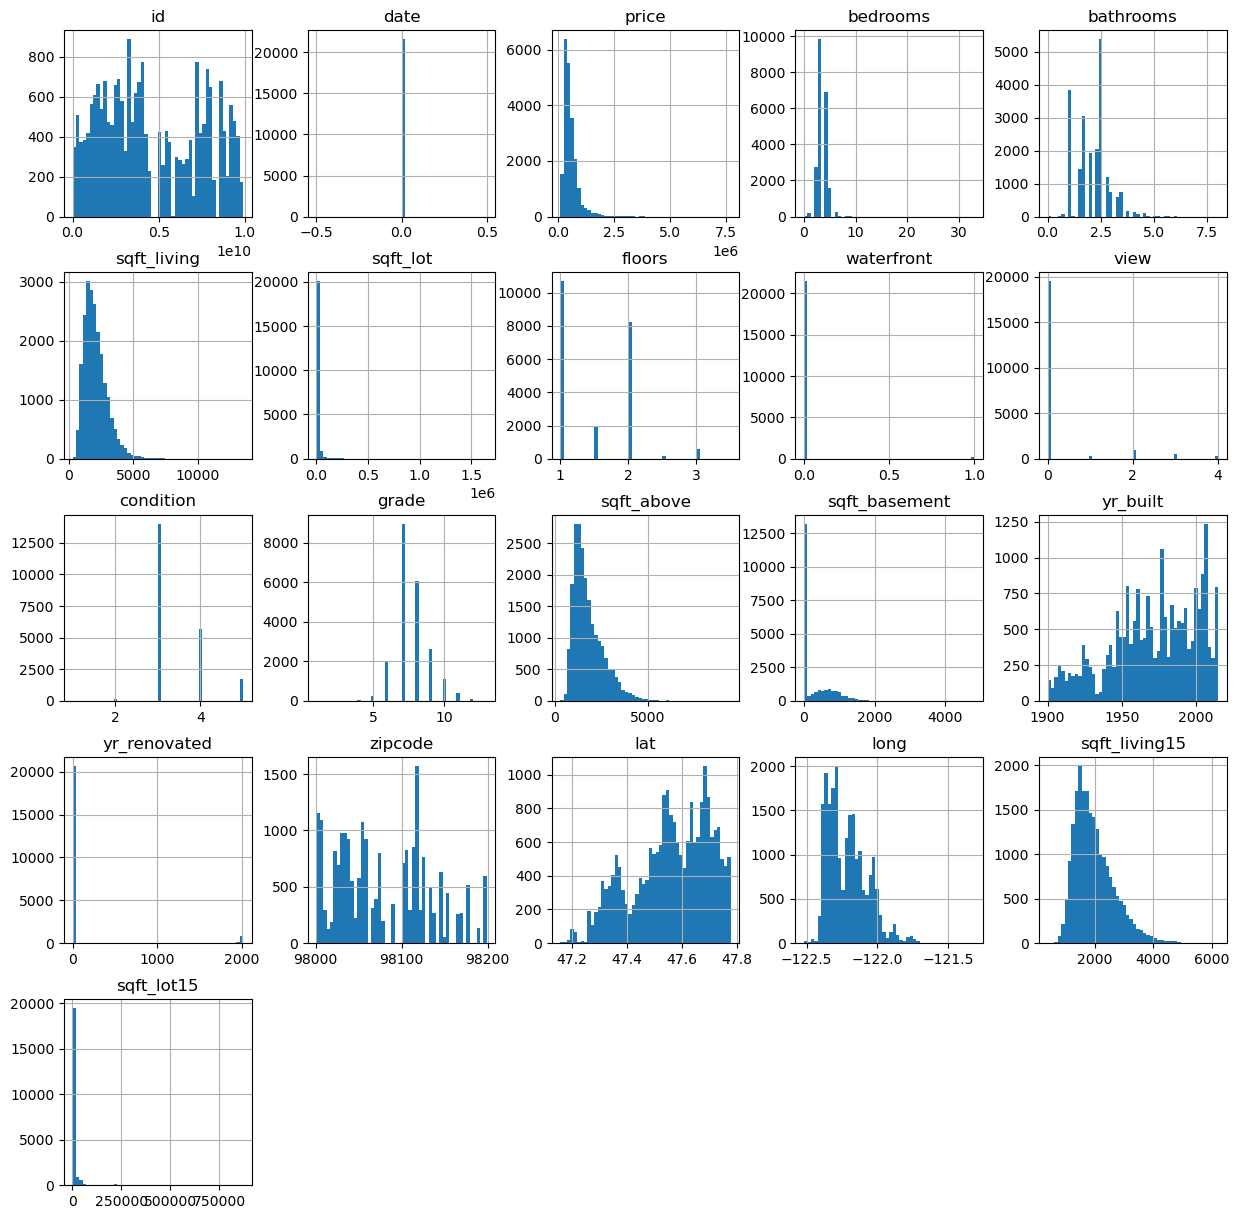

In [50]:
data.hist(bins=50, figsize=(15, 15))

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)


In [52]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
print(len(x_train), "train + ", len(x_test), "test")

19451 train +  2162 test


In [54]:
x_test.head(10)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6638,0,4,2.25,2410,4250,1.5,0,0,5,7,1460,950,1929,0,98117,47.6849,-122.376,1360,5074
7366,0,3,1.50,2170,16600,1.0,1,2,3,10,1130,1040,1979,0,98052,47.6307,-122.088,3130,13875
3158,0,2,1.00,1450,6380,1.0,0,0,3,7,1450,0,1967,0,98115,47.6924,-122.321,1240,6380
9117,0,5,3.25,4500,9648,2.0,0,4,4,8,3000,1500,1968,0,98125,47.7262,-122.282,2780,21132
3392,0,2,1.00,860,6000,1.0,0,0,3,6,860,0,1945,0,98022,47.2109,-121.985,1300,6000
305,0,3,1.75,1920,3300,1.0,0,0,4,8,960,960,1913,0,98112,47.6239,-122.298,1740,4000
14462,0,3,1.50,2500,6000,1.5,0,0,5,7,1730,770,1941,1984,98106,47.5297,-122.354,1340,5000
6196,0,4,2.25,2380,35008,1.0,0,0,3,8,2380,0,1977,0,98075,47.5834,-122.001,2250,34794
10194,0,4,2.50,2330,9928,2.0,0,0,3,8,2330,0,1998,0,98045,47.4836,-121.783,2430,8175
13457,0,3,3.00,2180,2650,1.5,0,0,5,8,1410,770,1930,0,98117,47.6891,-122.375,1570,4820


In [55]:
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.7320342760357493

In [56]:
y_pred = reg.predict(x_test)
y_pred

array([ 708968.57473732, 1454115.56763559,  422619.27778275, ...,
        191420.54893178,  238056.68598468,  451235.02573463])

After fitting our data to the model we can check the score of our data ie , prediction. in this case the prediction is 73%.
The accuracy of the model is lower than our aim of 85. So how do we achieve that 85% target ?

We use a different method , which is very important for weak prediction models such as this.

In [26]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [27]:
clf.fit(x_train, y_train)

C:\Users\Ashwini\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [28]:
clf.score(x_test,y_test)

0.9187059194950215

We got an accuracy of 91.87% which is amazing!

We can see that for weak predictions gradient boosting does the trick for the same train and test data.